In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set()
pd.set_option("display.max.columns", None)


In [77]:
a=open('subscribers','rb')
info3=pickle.load(a)
df5=pd.DataFrame(info3)

df1=pd.read_csv('channel_spend_graduate.csv')
df2=pd.read_csv('CQM_engagement_4mo_en.csv')

g=open('engagement (1)','rb')
info1=pickle.load(g)
df2=pd.DataFrame(info1)

d=open('customer_service_reps','rb')
info4=pickle.load(d)
df4=pd.DataFrame(info4)

In [56]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 162502 to 598241
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227628 non-null  int64         
 1   package_type                  192054 non-null  object        
 2   num_weekly_services_utilized  117178 non-null  float64       
 3   preferred_genre               191302 non-null  object        
 4   intended_use                  224079 non-null  object        
 5   weekly_consumption_hour       189698 non-null  float64       
 6   num_ideal_streaming_services  115458 non-null  float64       
 7   retarget_TF                   227628 non-null  bool          
 8   age                           192459 non-null  float64       
 9   male_TF                       227359 non-null  object        
 10  country                       227628 non-null  object        
 11  attribut

In [34]:
df=pd.read_csv('subscribers.csv')
df.describe(include=object)

,package_type,preferred_genre,intended_use,male_TF,country,attribution_technical,attribution_survey,op_sys,plan_type,account_creation_date,trial_end_date,language,payment_type,last_payment,next_payment,cancel_date
count,192054,191302,224079,227359,227628,227628,224984,214253,227628,227628,227628,227628,92050,132237,130250,36831
unique,3,5,7,2,1,33,16,2,11,226023,226023,1,6,131339,129206,284
top,base,comedy,access to exclusive content,False,UAE,facebook,facebook,iOS,base_uae_14_day_trial,2019-07-01 01:21:10,2019-07-15 01:21:10,ar,Standard Charter,2020-03-08 19:00:43,2020-07-08 19:00:43,2019-07-13 00:00:00
freq,111464,125129,89039,200902,227628,80251,119126,143921,227096,3,3,227628,38810,3,3,431


In [4]:
#dataframe
df.head(50)

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,2020-02-07 21:44:16,False,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,2020-03-15 15:44:35,False,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,2019-12-21 16:37:06,False,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,2020-02-10 16:09:32,False,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,2019-10-19 12:57:07,False,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True
5,284782,24810928,base,NaN,comedy,access to exclusive content,20.051667,NaN,70.0,False,UAE,bing,tv,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-03 20:15:43,2020-03-17 20:15:43,False,0.3303,ar,RAKBANK,14,True,1,2020-03-17 20:15:43,2020-07-17 20:15:43,NaN,True
6,192823,29726122,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,UAE,bing,search,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-19 18:30:15,2020-03-04 18:30:15,False,0.3303,ar,Standard Charter,14,True,1,2020-03-04 18:30:15,2020-07-04 18:30:15,NaN,True
7,315863,20299962,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,False,UAE,email,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-05 14:52:22,2020-03-19 14:52:22,False,0.0000,ar,RAKBANK,14,True,1,2020-03-19 14:52:22,2020-07-19 14:52:22,NaN,True
8,254782,24930568,base,NaN,comedy,access to exclusive content,25.851492,NaN,73.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-23 17:50:25,2020-03-08 17:50:25,False,0.6606,ar,NaN,14,True,1,2020-03-08 17:50:25,2020-07-08 17:50:25,NaN,True
9,681969,23452753,economy,3.0,drama,replace OTT,28.751405,2.0,71.0,False,UAE,search,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-21 14:17:53,2020-02-04 14:17:53,False,0.3303,ar,NaN,14,False,0,NaN,NaN,2020-01-27 00:00:00,False


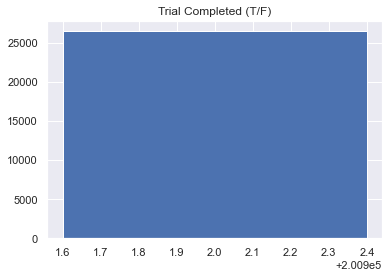

In [53]:
#male numbers
female=len(df5[df5['male_TF']==False])
male=len(df5[df5['male_TF']==True])

plt.bar(female,male)
plt.title('Trial Completed (T/F)')

plt.show()

In [32]:
#trials completed/current_subs
subst=df[df['current_sub_TF']==True]
subsf=df[df['current_sub_TF']==False]
subnum=df['current_sub_TF'].value_counts()

trialscompt=df[df['trial_completed']==True]
trialscompf=df[df['trial_completed']==False]

trialnum=df['trial_completed'].value_counts()

len(subst)

130250

In [59]:
#paid T/F
paidt=df5[df5['paid_TF']==True]
paidf=df5[df5['paid_TF']==False]
subnum=df5['paid_TF'].value_counts()

trialscompt=df[df['trial_completed']==True]
trialscompf=df[df['trial_completed']==False]

trialnum=df['trial_completed'].value_counts()

len(subst)

130250

In [71]:
paidt.describe(include=object)

,package_type,preferred_genre,intended_use,male_TF,country,attribution_technical,attribution_survey,op_sys,plan_type,language,payment_type
count,77418,77106,90388,91874,92050,92050,90760,86567,92050,92050,92050
unique,3,5,7,2,1,33,16,2,11,1,6
top,base,comedy,access to exclusive content,False,UAE,facebook,facebook,iOS,base_uae_14_day_trial,ar,Standard Charter
freq,46367,49993,37580,79803,92050,30105,45862,61349,91776,92050,38810


In [72]:
paidf.describe(include=object)

,package_type,preferred_genre,intended_use,male_TF,country,attribution_technical,attribution_survey,op_sys,plan_type,language,payment_type
count,114636,114196,133691,135485,135578,135578,134224,127686,135578,135578,0
unique,3,5,7,2,1,33,16,2,7,1,0
top,base,comedy,access to exclusive content,False,UAE,facebook,facebook,iOS,base_uae_14_day_trial,ar,NaN
freq,65097,75136,51459,121099,135578,50146,73264,82572,135320,135578,NaN


In [66]:
female1=len(paidt[paidt['male_TF']==False])
male1=len(paidt[paidt['male_TF']==True])



femalen=len(paidf[paidf['male_TF']==False])
malen=len(paidf[paidf['male_TF']==True])

In [69]:
malen

14386

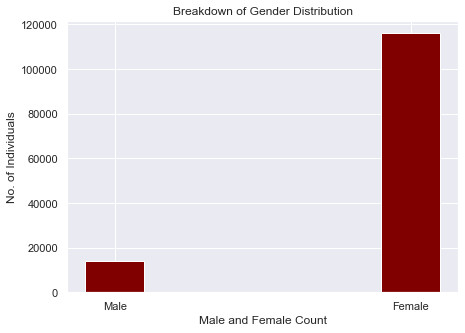

In [46]:
data = {'Male':male1, 'Female':female1}
numbers = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (7, 5))
 
# creating the bar plot
plt.bar(numbers, values, color ='maroon',
        width = 0.2)
 
plt.xlabel("Male and Female Count")
plt.ylabel("No. of Individuals")
plt.title("Breakdown of Gender Distribution")
plt.show()

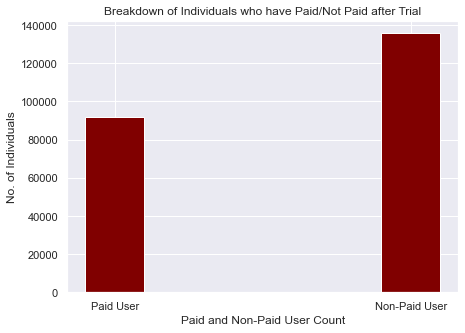

In [70]:
data = {'Paid User':len(paidt), 'Non-Paid User':len(paidf)}
numbers = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (7, 5))
 
# creating the bar plot
plt.bar(numbers, values, color ='maroon',
        width = 0.2)
 
plt.xlabel("Paid and Non-Paid User Count")
plt.ylabel("No. of Individuals")
plt.title("Breakdown of Individuals who have Paid/Not Paid after Trial")
plt.show()

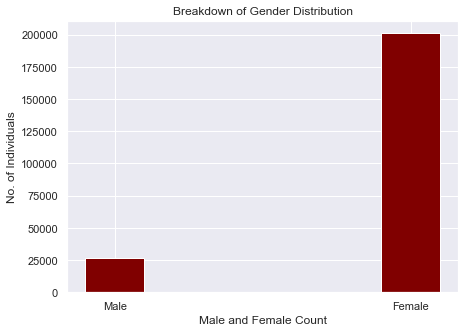

In [42]:
data = {'Male':male, 'Female':female}
numbers = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (7, 5))
 
# creating the bar plot
plt.bar(numbers, values, color ='maroon',
        width = 0.2)
 
plt.xlabel("Male and Female Count")
plt.ylabel("No. of Individuals")
plt.title("Breakdown of Gender Distribution")
plt.show()

In [ ]:
subst.drop(['weekly_consumption_hour','num_ideal_streaming_services','age'],axis=1,inplace=True)

In [36]:
subst.describe()

,Unnamed: 0,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,months_per_bill_period,monthly_price,discount_price,join_fee,num_trial_days,payment_period
count,130250.000000,1.302500e+05,65407.000000,104535.000000,64610.000000,1.059020e+05,130250.0,130250.000000,130250.000000,106120.000000,130250.000000,130250.000000
mean,346298.494887,2.499007e+07,3.222621,28.488049,2.092818,1.936723e+02,4.0,4.733502,4.513563,0.129187,13.995056,1.292614
std,190854.804059,2.883337e+06,0.880165,5.005483,0.296459,2.631981e+04,0.0,0.069647,0.067649,0.183892,0.263053,0.615581
min,52.000000,2.000005e+07,0.000000,-32.146760,0.000000,0.000000e+00,4.0,1.064300,1.027600,-0.660600,0.000000,0.000000
25%,184446.750000,2.249534e+07,3.000000,25.851492,2.000000,3.200000e+01,4.0,4.734300,4.514100,0.036700,14.000000,1.000000
50%,338909.500000,2.498129e+07,3.000000,28.751405,2.000000,4.300000e+01,4.0,4.734300,4.514100,0.036700,14.000000,1.000000
75%,511688.750000,2.749583e+07,4.000000,31.651317,2.000000,5.400000e+01,4.0,4.734300,4.514100,0.110100,14.000000,2.000000
max,682885.000000,2.999998e+07,14.000000,76.599962,7.000000,8.061990e+06,4.0,5.101300,5.027900,0.734000,14.000000,3.000000


In [37]:
subsf.describe()

,Unnamed: 0,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,months_per_bill_period,monthly_price,discount_price,join_fee,num_trial_days,payment_period
count,97378.000000,9.737800e+04,51771.000000,85163.000000,50848.000000,8.655700e+04,97378.0,97378.000000,97378.000000,86604.000000,97378.000000,97378.000000
mean,334214.900573,2.498112e+07,2.738715,27.395865,2.021161,1.448397e+03,4.0,4.730106,4.510350,0.097940,13.982173,0.118004
std,204940.631968,2.888499e+06,0.643756,4.873381,0.150861,2.848446e+05,0.0,0.131810,0.126105,0.166496,0.499268,0.342801
min,1.000000,2.000001e+07,1.000000,-29.246847,-1.000000,0.000000e+00,4.0,0.807400,0.770700,-0.330300,0.000000,0.000000
25%,141381.250000,2.248344e+07,2.000000,24.401536,2.000000,4.000000e+01,4.0,4.734300,4.514100,0.036700,14.000000,0.000000
50%,344087.500000,2.495556e+07,3.000000,27.301448,2.000000,5.000000e+01,4.0,4.734300,4.514100,0.036700,14.000000,0.000000
75%,512093.000000,2.748360e+07,3.000000,30.201361,2.000000,6.000000e+01,4.0,4.734300,4.514100,0.036700,14.000000,0.000000
max,682855.000000,2.999984e+07,7.000000,66.450268,3.000000,8.172000e+07,4.0,5.101300,5.027900,0.697300,14.000000,2.000000


In [33]:
subst=subsf[subsf['account_creation_date'] > 2019-06-01]

2019-07-01 01:21:10    3
2019-06-30 14:47:57    3
2019-07-02 14:58:45    3
2020-03-13 01:29:42    2
2019-12-27 23:38:56    2
2019-06-30 17:40:31    2
2019-07-03 12:42:31    2
2019-07-02 01:23:32    2
2020-03-03 12:35:05    2
2019-07-05 20:59:54    2
2019-07-18 14:16:29    2
2019-07-15 15:00:48    2
2019-07-08 12:21:58    2
2019-07-01 21:13:05    2
2019-06-30 17:27:47    2
2019-07-04 14:20:00    2
2019-07-04 00:30:48    2
2019-08-28 13:59:15    2
2019-10-12 03:04:26    2
2020-03-05 14:02:30    2
2019-07-04 14:58:02    2
2019-11-18 21:51:01    2
2019-10-09 19:31:12    2
2019-10-22 03:37:54    2
2019-09-14 00:08:46    2
2019-08-07 16:45:24    2
2019-07-01 00:08:23    2
2019-07-01 03:21:27    2
2020-01-29 14:23:25    2
2019-06-30 20:14:12    2
Name: account_creation_date, dtype: int64

In [22]:
#Subscribers
subst.drop(['weekly_consumption_hour','num_ideal_streaming_services','age'],axis=1,inplace=True)




KeyError: "['weekly_consumption_hour' 'num_ideal_streaming_services' 'age'] not found in axis"

In [24]:
subst.describe()

,Unnamed: 0,months_per_bill_period,monthly_price,discount_price,join_fee,num_trial_days,payment_period
count,130250.000000,130250.0,130250.000000,130250.000000,106120.000000,130250.000000,130250.000000
mean,346298.494887,4.0,4.733502,4.513563,0.129187,13.995056,1.292614
std,190854.804059,0.0,0.069647,0.067649,0.183892,0.263053,0.615581
min,52.000000,4.0,1.064300,1.027600,-0.660600,0.000000,0.000000
25%,184446.750000,4.0,4.734300,4.514100,0.036700,14.000000,1.000000
50%,338909.500000,4.0,4.734300,4.514100,0.036700,14.000000,1.000000
75%,511688.750000,4.0,4.734300,4.514100,0.110100,14.000000,2.000000
max,682885.000000,4.0,5.101300,5.027900,0.734000,14.000000,3.000000


In [25]:
subsf.drop(['subid','num_weekly_services_utilized','weekly_consumption_hour','num_ideal_streaming_services','age'],axis=1,inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
#Subscribers
subst.describe()

,Unnamed: 0,months_per_bill_period,monthly_price,discount_price,join_fee,num_trial_days,payment_period
count,130250.000000,130250.0,130250.000000,130250.000000,106120.000000,130250.000000,130250.000000
mean,346298.494887,4.0,4.733502,4.513563,0.129187,13.995056,1.292614
std,190854.804059,0.0,0.069647,0.067649,0.183892,0.263053,0.615581
min,52.000000,4.0,1.064300,1.027600,-0.660600,0.000000,0.000000
25%,184446.750000,4.0,4.734300,4.514100,0.036700,14.000000,1.000000
50%,338909.500000,4.0,4.734300,4.514100,0.036700,14.000000,1.000000
75%,511688.750000,4.0,4.734300,4.514100,0.110100,14.000000,2.000000
max,682885.000000,4.0,5.101300,5.027900,0.734000,14.000000,3.000000


In [26]:
#Non-subscribers
subsf.describe()

,Unnamed: 0,months_per_bill_period,monthly_price,discount_price,join_fee,num_trial_days,payment_period
count,97378.000000,97378.0,97378.000000,97378.000000,86604.000000,97378.000000,97378.000000
mean,334214.900573,4.0,4.730106,4.510350,0.097940,13.982173,0.118004
std,204940.631968,0.0,0.131810,0.126105,0.166496,0.499268,0.342801
min,1.000000,4.0,0.807400,0.770700,-0.330300,0.000000,0.000000
25%,141381.250000,4.0,4.734300,4.514100,0.036700,14.000000,0.000000
50%,344087.500000,4.0,4.734300,4.514100,0.036700,14.000000,0.000000
75%,512093.000000,4.0,4.734300,4.514100,0.036700,14.000000,0.000000
max,682855.000000,4.0,5.101300,5.027900,0.697300,14.000000,2.000000


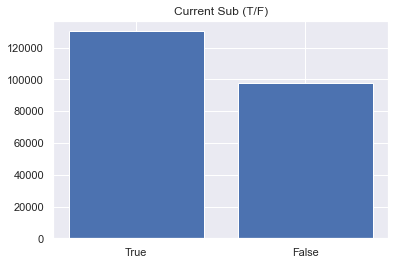

In [8]:
subg=['True','False']
plt.bar(subg,subnum)
plt.title('Current Sub (T/F)')
plt.show()


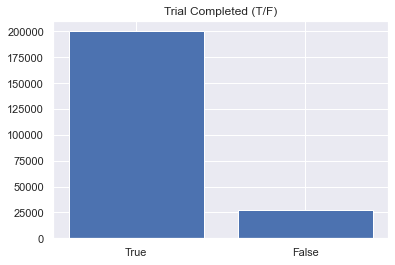

In [9]:
plt.bar(subg,trialnum)
plt.title('Trial Completed (T/F)')

plt.show()

In [16]:
#useful information about our dataset
df.describe(include=object)

,package_type,preferred_genre,intended_use,male_TF,country,attribution_technical,attribution_survey,op_sys,plan_type,account_creation_date,trial_end_date,language,payment_type,last_payment,next_payment,cancel_date
count,192054,191302,224079,227359,227628,227628,224984,214253,227628,227628,227628,227628,92050,132237,130250,36831
unique,3,5,7,2,1,33,16,2,11,226023,226023,1,6,131339,129206,284
top,base,comedy,access to exclusive content,False,UAE,facebook,facebook,iOS,base_uae_14_day_trial,2020-02-29 19:26:26,2020-01-11 16:35:34,ar,Standard Charter,2020-03-14 19:26:26,2020-06-29 12:16:18,2019-07-13 00:00:00
freq,111464,125129,89039,200902,227628,80251,119126,143921,227096,3,3,227628,38810,3,3,431


In [86]:
x=df.value_counts(df['preferred_genre'])

xx=df.value_counts(df['cancel_date'],ascending=True).head(50)
#understand why cancel date was high
dfgroup=df.groupby('account_creation_date')
y=dfgroup.get_group('2020-02-29 19:26:26').head(31)
y.describe(include=object)

,package_type,preferred_genre,intended_use,male_TF,country,attribution_technical,attribution_survey,op_sys,plan_type,account_creation_date,trial_end_date,language,payment_type,last_payment,next_payment,cancel_date
count,3,3,3,3,3,3,3,3,3,3,3,3,1,3,3,0
unique,1,3,2,1,1,2,2,1,1,1,1,1,1,1,1,0
top,enhanced,regional,access to exclusive content,False,UAE,organic,facebook,iOS,base_uae_14_day_trial,2020-02-29 19:26:26,2020-03-14 19:26:26,ar,Paypal,2020-03-14 19:26:26,2020-07-14 19:26:26,NaN
freq,3,1,2,3,3,2,2,3,3,3,3,3,1,3,3,NaN


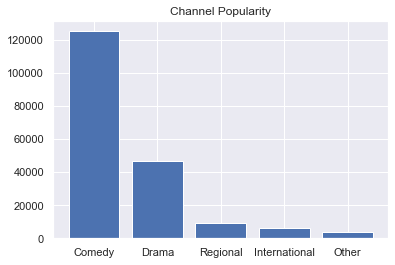

In [43]:
#bar graph of comedy layed out
valuegenre=df['preferred_genre'].value_counts()
valuegenrelist=['Comedy','Drama','Regional','International','Other']

plt.bar(valuegenrelist,valuegenre)
plt.title('Channel Popularity')
plt.show()

In [75]:
yy=dfgroup.get_group('2019-07-01 00:00:00')
df.describe()

,Unnamed: 0,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,months_per_bill_period,monthly_price,discount_price,join_fee,num_trial_days,payment_period
count,227628.000000,2.276280e+05,117178.000000,189698.000000,115458.000000,1.924590e+05,227628.0,227628.000000,227628.000000,192724.000000,227628.000000,227628.000000
mean,341129.200041,2.498624e+07,3.008824,27.997724,2.061260,7.579755e+02,4.0,4.732049,4.512188,0.115145,13.989544,0.790122
std,197094.201084,2.885543e+06,0.820526,4.976341,0.245907,1.920204e+05,0.0,0.101049,0.097078,0.176971,0.382453,0.777713
min,1.000000,2.000001e+07,0.000000,-32.146760,-1.000000,0.000000e+00,4.0,0.807400,0.770700,-0.660600,0.000000,0.000000
25%,170766.250000,2.248998e+07,2.000000,24.401536,2.000000,3.500000e+01,4.0,4.734300,4.514100,0.036700,14.000000,0.000000
50%,340985.500000,2.497011e+07,3.000000,27.301448,2.000000,4.600000e+01,4.0,4.734300,4.514100,0.036700,14.000000,1.000000
75%,511844.000000,2.749020e+07,3.000000,30.201361,2.000000,5.700000e+01,4.0,4.734300,4.514100,0.110100,14.000000,1.000000
max,682885.000000,2.999998e+07,14.000000,76.599962,7.000000,8.172000e+07,4.0,5.101300,5.027900,0.734000,14.000000,3.000000


In [78]:
#dataframe1
df1.head(50)

,channel,date,spend_AED
0,bing,201907,400
1,display,201907,12
2,facebook,201907,9000
3,search,201907,13000
4,youtube,201907,90
5,bing,201908,900
6,display,201908,20
7,facebook,201908,13000
8,search,201908,18500
9,youtube,201908,180


In [79]:
df1['channel'].value_counts()

bing        8
search      8
facebook    8
display     8
youtube     8
Name: channel, dtype: int64

In [80]:
df1.describe(include=object)

,channel
count,40
unique,5
top,bing
freq,8


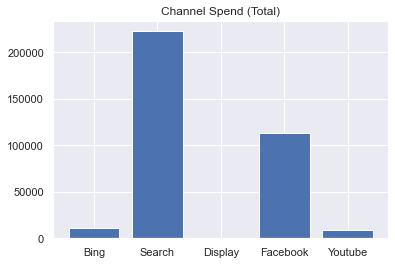

8730

In [82]:
bingcount=df1.loc[df1['channel'] == 'bing', 'spend_AED'].sum()
searchcount=df1.loc[df1['channel'] == 'search', 'spend_AED'].sum()
displaycount=df1.loc[df1['channel'] == 'display', 'spend_AED'].sum()
facebookcount=df1.loc[df1['channel'] == 'facebook', 'spend_AED'].sum()
youtubecount=df1.loc[df1['channel'] == 'youtube', 'spend_AED'].sum()

countlist=[bingcount,searchcount,displaycount,facebookcount,youtubecount]
namelist=['Bing','Search','Display','Facebook','Youtube']
plt.bar(namelist,countlist)
plt.title('Channel Spend (Total)')
plt.show()

youtubecount

In [121]:
#bar graph of a attribution_survey (finding of streaming service)
attributioncounts=df['attribution_survey'].value_counts()
attributioncounts

facebook            119126
tv                   39904
referral             20882
search                8492
pinterest             7856
other                 6496
public_radio          6219
social_organic        3869
youtube               3108
podcast               2995
affiliate             1962
ott                   1443
sirius xm             1122
facebook_organic       765
direct_mail            408
amfm_radio             337
Name: attribution_survey, dtype: int64

In [36]:
x1=df1.value_counts(df1['channel'])
x1

channel
bing        8
display     8
facebook    8
search      8
youtube     8
dtype: int64

In [39]:
#dataframe2 - not sure if this is correct
df2.head(50)

,access_code,subscription_id,date,app_opens,coach_messages,content,content_assignments,exercises,food_logs,group_posts,weigh_ins
0,1BBU7BJ2,14596788,2019-01-01,0,0,0,0,0,0,0,0
1,1FF4X7H9,14629614,2019-01-01,1,0,7,7,0,0,0,0
2,1FF4X7H9,14629614,2019-01-02,0,1,0,0,0,0,0,0
3,1GN3P4WZ,14668350,2019-01-02,1,1,0,6,0,0,0,0
4,1GN3P4WZ,14668350,2019-01-03,1,0,0,5,0,0,0,0
5,1GN3P4WZ,14668350,2019-01-04,0,1,0,0,0,0,0,0
6,1FF4X7H9,14629614,2019-01-07,1,0,0,5,0,0,0,0
7,1FF4X7H9,14629614,2019-01-08,0,1,0,0,0,0,0,0
8,14PME5BY,14692440,2019-01-02,3,1,7,7,1,0,0,1
9,14PME5BY,14692440,2019-01-03,2,1,9,12,1,4,0,1


In [85]:
df2.describe()


,subscription_id,app_opens,coach_messages,content,content_assignments,exercises,food_logs,group_posts,weigh_ins
count,1.384300e+07,1.384300e+07,1.384300e+07,1.384300e+07,1.384300e+07,1.384300e+07,1.384300e+07,1.384300e+07,1.384300e+07
mean,1.749112e+07,2.041906e+00,3.204219e-01,2.293126e+00,4.040498e+00,3.085099e-01,2.637914e+00,4.995137e-02,6.321729e-01
std,1.999981e+06,2.246298e+00,7.425575e-01,2.177408e+00,1.517247e+00,6.166048e-01,2.067746e+00,2.619332e-01,4.823349e-01
min,1.457395e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.579040e+07,1.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.729725e+07,1.000000e+00,0.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00
75%,1.891108e+07,3.000000e+00,0.000000e+00,4.000000e+00,5.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00
max,2.164719e+07,3.760000e+02,6.300000e+01,2.200000e+01,2.800000e+01,2.140000e+02,1.600000e+01,1.200000e+01,2.000000e+00


In [56]:
df2.value_counts(df2['access_code'],ascending=False).head(50)



access_code
BJ5DUKWS    301
5AD3DA2V    301
DJEMCS6S    301
Q8R9K3DQ    301
A97SUFYI    301
NXR1SZ6S    301
IRS395YZ    301
WMQA71HH    301
1A84U8SZ    301
Y1UAHZWH    301
XF1ESK9H    301
24N16LNH    301
B2RE8X15    301
NLYXUNV5    301
DFW1TNYK    301
TWCKXEKX    301
LKKXVI1V    301
1Y13GHVU    301
CWQKGDLC    301
67VSKU4Y    301
7T5V6KQ1    301
FSQC8BXM    301
YVAEEQQG    301
T28JB3U1    301
5IAZCYIT    301
UDYXEP5X    301
A4J8GNRT    301
YKV6YE6J    301
CHQB3AJ3    301
JLNKD3Q2    300
SZKNDHSV    300
XVH6UBFC    300
L1RFVIA3    300
QXY7VZXS    300
MW35BL2U    300
9HDISSRE    300
G32BTBGU    300
1HJR6D5J    300
1QUCC5M1    300
VUQ3QKDY    300
5LBDIZFP    300
DH1I1HW6    300
2SEREM4C    300
Y119MHDT    300
P5D3ZMIB    300
2ZFQ3SD2    300
6A27NH8B    300
JCIJ9913    300
14WYHD1D    300
4VGK7TJ4    300
dtype: int64

In [ ]:
df2group=df2.groupby('access_code')
df2group.get_group('1SFXNN2U')